In [2]:
%matplotlib inline
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
# import auquanToolbox.dataloader as dl
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt
import mplfinance as mpf


from statsmodels.tsa.arima.model import ARIMA
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.tsa.stattools as smts 
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.metrics import mean_squared_error
yf.pdr_override()



In [3]:
def tsa_plots(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()

def run_adf_test(series, alpha=0.05):
    res = smts.adfuller(series)
#     print(res)
    print("ADF Statistic: %f" % res[0])
    print("p value: %f" % res[1])
    if res[1] < 0.05:
        print("Series IS stationary!")
    else:
        print("Series IS NOT stationary!")
        

In [10]:
stock='SPY'
### Training data
start_train = "2014-01-01"
end_train = "2016-12-31"
train = yf.download(stock, start_train, end_train, interval='1d')
train.head()

### Testing data
start_test = "2017-01-01"
end_test = "2020-09-30"

test = yf.download(stock,start_test, end_test, interval='1d')
test.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,209.785889,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,211.033981,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,210.866318,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,211.620728,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,210.922211,46939700


In [5]:
run_adf_test(np.diff(train["Close"]))
## can work with this

ADF Statistic: -20.959551
p value: 0.000000
Series IS stationary!


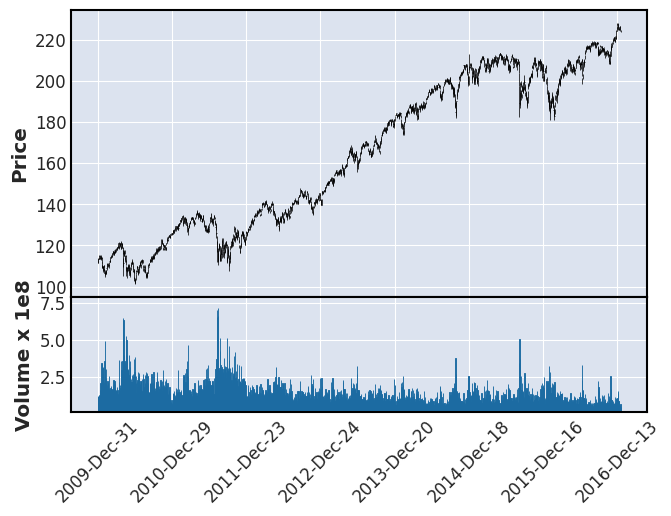

In [6]:
mpf.plot(train, volume = True)

942


Date
2017-01-03    225.240005
2017-01-04    226.580002
2017-01-05    226.399994
2017-01-06    227.210007
2017-01-09    226.460007
                 ...    
2020-09-23    322.640015
2020-09-24    323.500000
2020-09-25    328.730011
2020-09-28    334.190002
2020-09-29    332.369995
Name: Close, Length: 942, dtype: float64

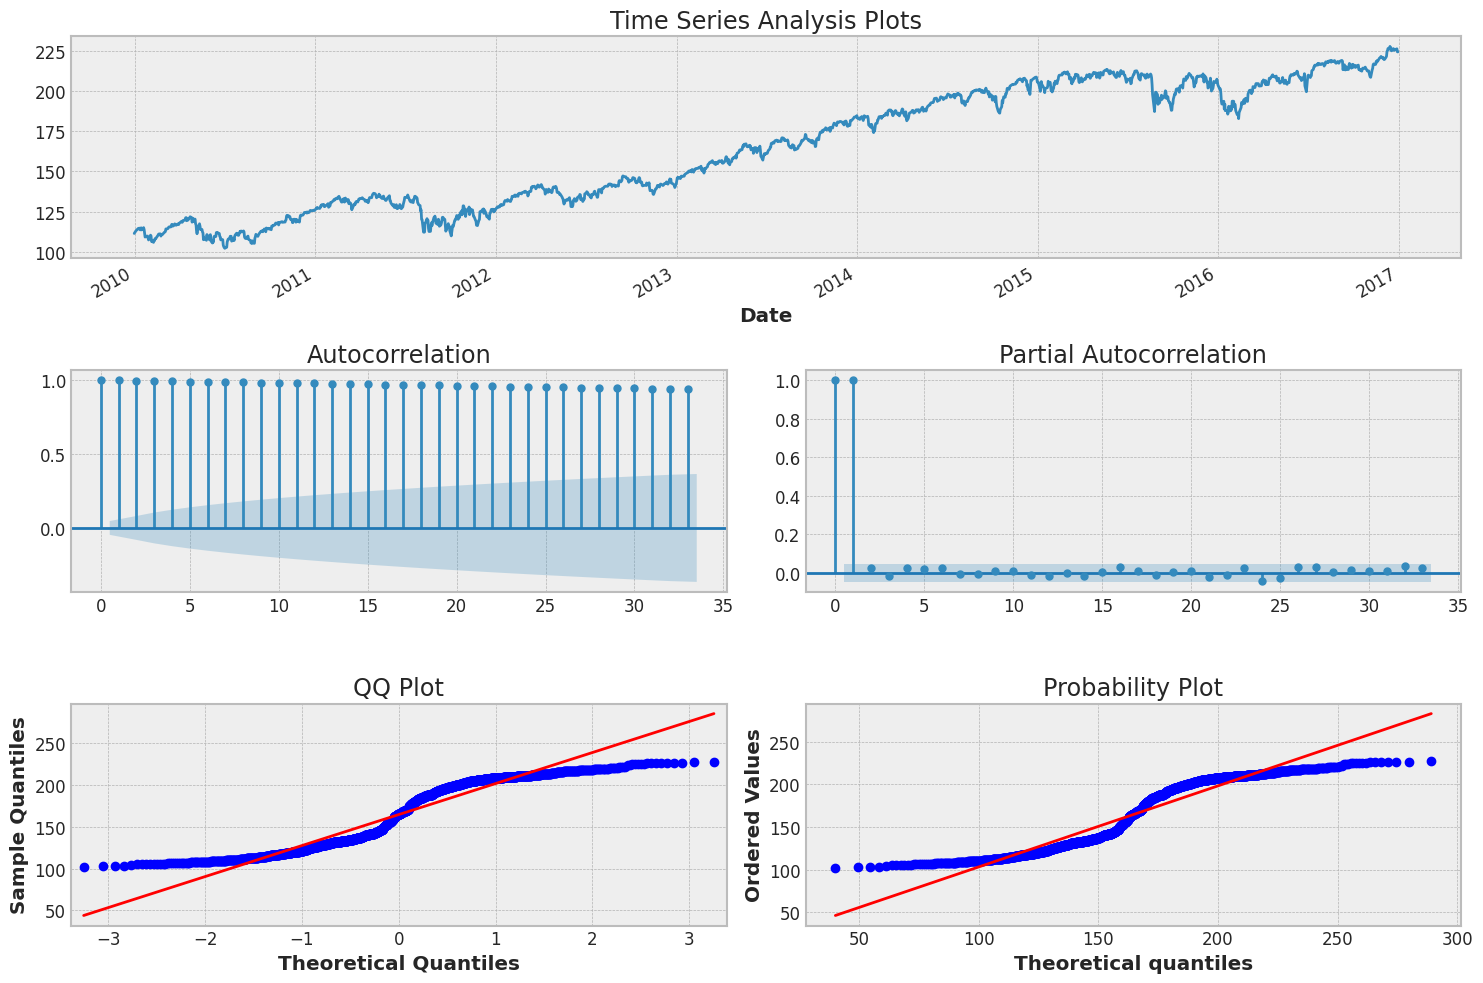

In [7]:
# tsa_plots(np.diff(train["Close"]))
tsa_plots(train["Close"])
print(len(test["Close"]))
test["Close"]




In [11]:
## generating and testing ARIMA model

history = [x for x in train["Close"]]
predictions = []

for i in range(0, len(test["Close"])):
#     if (i % 50) == 0:
    print(i, "iteration")
    model = ARIMA(history, order=(1, 1, 30))
    fitted_model = model.fit()
    output = fitted_model.forecast()
    pred_val = output[0]
    act_val = test["Close"][i]
    history.append(act_val)
                
mse = mean_squared_error(test, predictions)
print("MSE: %.4f" % mse)
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()
        
                  

0 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


4 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


5 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


6 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


7 iteration


/home/rhizi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


8 iteration


KeyboardInterrupt: 